In [1]:
import pandas as pd

import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [67]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [68]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [69]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [70]:
df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [71]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [5]:
df.Sex=df.Sex.replace(to_replace=['M', 'F'], value=[0, 1])
df.ExerciseAngina=df.ExerciseAngina.replace(to_replace=['N', 'Y'], value=[0, 1])
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [6]:
df = df[df["Cholesterol"] != 0]
df = df[df["RestingBP"] != 0]

In [7]:
df = pd.get_dummies(df)

In [8]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   Sex                746 non-null    int64  
 2   RestingBP          746 non-null    int64  
 3   Cholesterol        746 non-null    int64  
 4   FastingBS          746 non-null    int64  
 5   MaxHR              746 non-null    int64  
 6   ExerciseAngina     746 non-null    int64  
 7   Oldpeak            746 non-null    float64
 8   HeartDisease       746 non-null    int64  
 9   ChestPainType_ASY  746 non-null    uint8  
 10  ChestPainType_ATA  746 non-null    uint8  
 11  ChestPainType_NAP  746 non-null    uint8  
 12  ChestPainType_TA   746 non-null    uint8  
 13  RestingECG_LVH     746 non-null    uint8  
 14  RestingECG_Normal  746 non-null    uint8  
 15  RestingECG_ST      746 non-null    uint8  
 16  ST_Slope_Down      746 non

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]


- TA: Typical Angina - This refers to a specific type of chest pain that is consistent with angina pectoris. Typical angina is characterized by a predictable pattern of chest discomfort or pain that occurs during physical exertion or emotional stress. The pain is often described as a squeezing or pressure-like sensation in the chest and may radiate to the left arm or jaw. It usually resolves with rest or nitroglycerin medication.

- ATA: Atypical Angina - Atypical angina refers to chest pain that does not fit the typical pattern of angina. The symptoms may be less predictable or have different characteristics than those of typical angina. Atypical angina can still be related to heart problems, but it may present with symptoms such as sharp or stabbing chest pain, shortness of breath, or pain in locations other than the chest.

- NAP: Non-Anginal Pain - Non-Anginal Pain refers to chest discomfort or pain that is not caused by coronary artery disease or angina. It may be due to other factors such as musculoskeletal issues, gastrointestinal problems, anxiety, or respiratory conditions. Non-anginal pain can still be distressing and requires evaluation to determine its underlying cause.

- ASY: Asymptomatic - Asymptomatic refers to the absence of symptoms. In the context of chest pain, it means that an individual does not experience any discomfort or pain in the chest region, even during physical exertion or emotional stress. However, it's important to note that asymptomatic individuals can still have underlying heart conditions that may require medical attention.

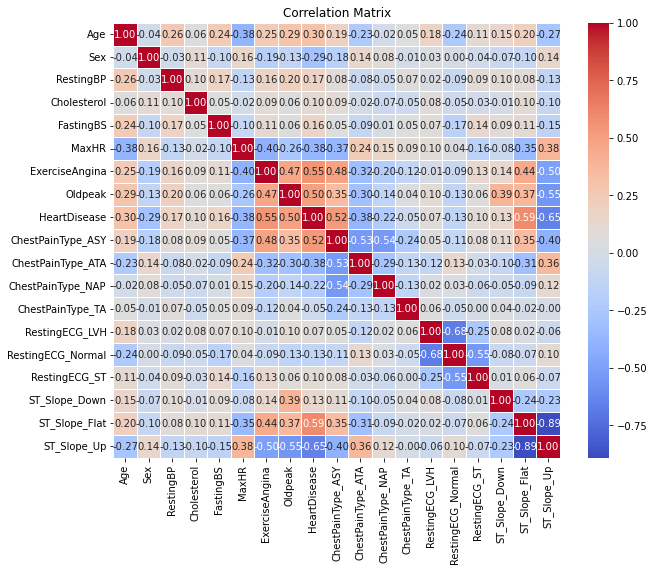

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

HeartDisease correlated with: 1. ST_Slope_Up, 2. ST_Slope_Flat        

ST_Slope_Up **HIGHLY** correlated with: ST_Slope_Flat     

ChestPainType_NAP correlated with: ChestPainType_TA

RestingECG correlated with: 1. RestingECG_LVH, 2. RestingECG_Normal

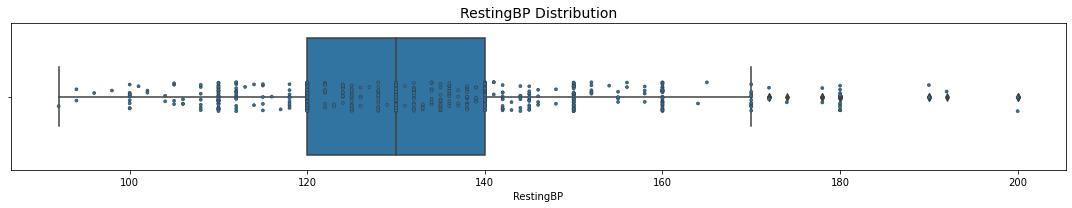

In [11]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='RestingBP')
sns.stripplot(data=df, x='RestingBP', linewidth = 0.6, size=3)
plt.title('RestingBP Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

### Throw Zero RestingBP

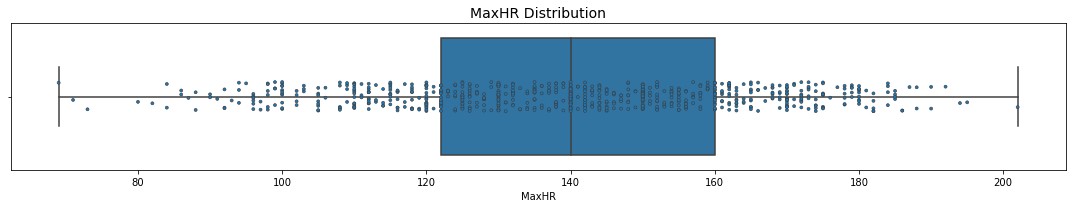

In [12]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='MaxHR')
sns.stripplot(data=df, x='MaxHR', linewidth = 0.6, size=3)
plt.title('MaxHR Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

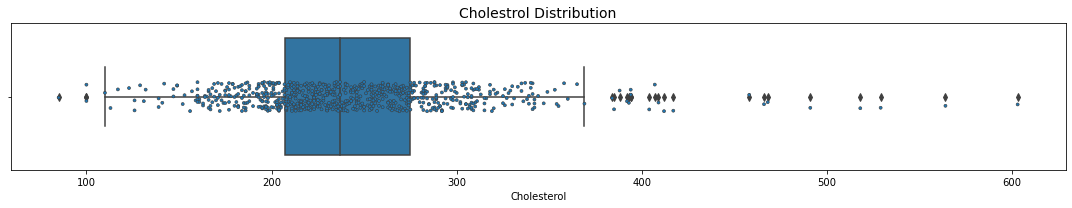

In [13]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='Cholesterol')
sns.stripplot(data=df, x='Cholesterol', linewidth = 0.6, size=3)
plt.title('Cholestrol Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

## !Zeros in choresterol seems false!

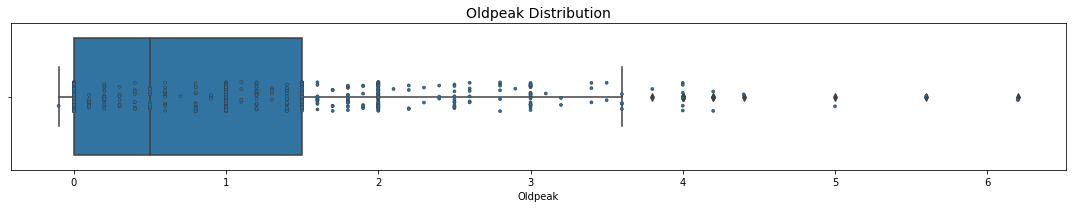

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='Oldpeak')
sns.stripplot(data=df, x='Oldpeak', linewidth = 0.6, size=3)
plt.title('Oldpeak Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

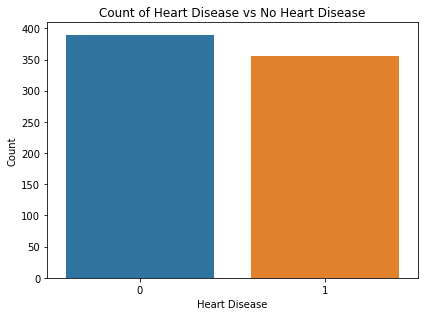

In [15]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['HeartDisease'].value_counts().reset_index(), x='index', y='HeartDisease',  ax=ax)
ax.set(title='Count of Heart Disease vs No Heart Disease', ylabel='Count', xlabel='Heart Disease')
plt.tight_layout()
plt.show()

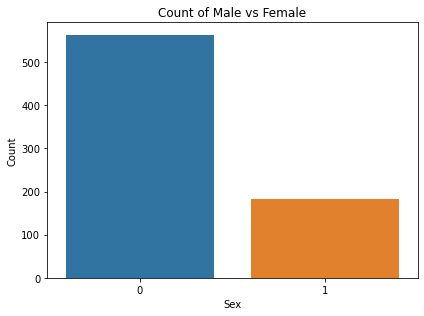

In [16]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax = sns.barplot(data=df['Sex'].value_counts().reset_index(), x='index', y='Sex', ax=ax)
ax.set(title='Count of Male vs Female', ylabel='Count', xlabel='Sex')
plt.tight_layout()
plt.show()

### !!! Drop comments

In [33]:
from time import time
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline

## Get the most importance features

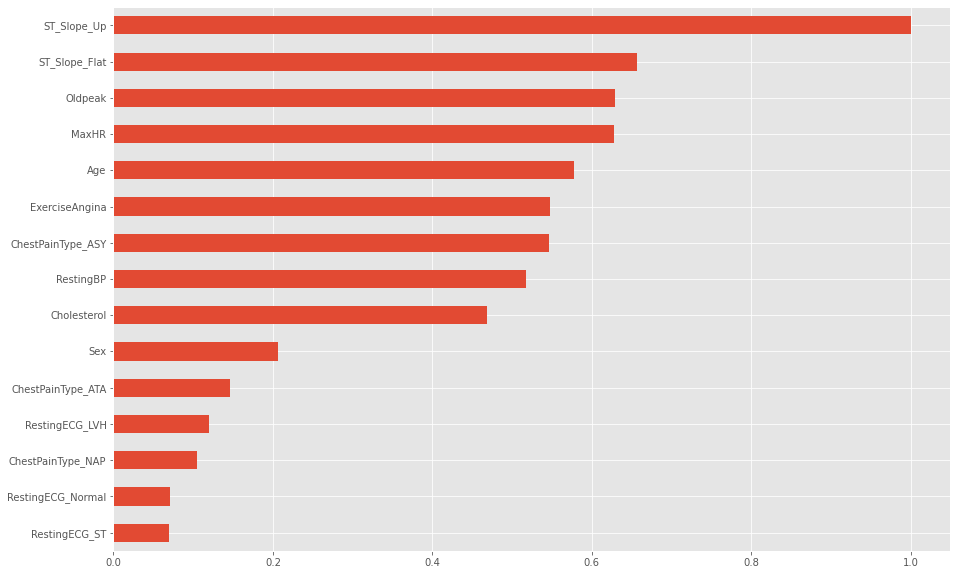

In [78]:


X = df.drop('HeartDisease', 1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

classifier = RandomForestClassifier(class_weight='balanced')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

importance = pd.Series(classifier.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(15)
importance.sort_values().plot.barh(figsize=(15,10))
plt.show()

## MRMR

In [24]:
from mrmr import mrmr_classif
#MR-MR method chooses the most significant columns
selected_cols = mrmr_classif(pd.DataFrame(X_train, columns = X.columns), y_train.values, K=15)
selected_cols

100%|██████████| 15/15 [00:09<00:00,  1.59it/s]


['ST_Slope_Up',
 'ChestPainType_ASY',
 'ExerciseAngina',
 'ST_Slope_Flat',
 'Oldpeak',
 'Sex',
 'MaxHR',
 'ChestPainType_ATA',
 'Age',
 'ChestPainType_NAP',
 'RestingBP',
 'FastingBS',
 'RestingECG_Normal',
 'ST_Slope_Down',
 'ChestPainType_TA']

## Run all the boosting classifier the find the best

In [61]:
X = df.drop(['HeartDisease'], 1)

y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = [
              GradientBoostingClassifier(),
              AdaBoostClassifier(),
              xgb.XGBClassifier(),
              lgb.LGBMClassifier()
              ]

scalers = [StandardScaler(), 
           MinMaxScaler(), 
           RobustScaler()
          ]
for scaler in scalers:
    for clfs in clf:
        
        # Create the pipeline with selected features and SVC
        pipe = Pipeline([
            ('scaler', scaler),
            ('classifier', clfs)
        ])

        # Perform cross-validation on the selected features
        cv_scores_recall_macro = cross_val_score(pipe, X_train, y_train, cv=10, scoring='recall')
        cv_scores_balanced_accuracy = cross_val_score(pipe, X_train, y_train, cv=10, scoring='balanced_accuracy')

        # Calculate mean scores
        print(f"{scaler  }, {clfs} has mean_f1_macro {cv_scores_recall_macro.mean()}")
        print(f"{scaler  }, {clfs} has mean_balanced_macro {cv_scores_balanced_accuracy.mean()}")



StandardScaler(), GradientBoostingClassifier() has mean_f1_macro 0.8427350427350427
StandardScaler(), GradientBoostingClassifier() has mean_balanced_macro 0.8471519795657727
StandardScaler(), AdaBoostClassifier() has mean_f1_macro 0.823931623931624
StandardScaler(), AdaBoostClassifier() has mean_balanced_macro 0.8250117889773062
StandardScaler(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estima

## The best model is LGBMClassifier and optimize this with gridsearch 

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix
X = df.drop(['HeartDisease'], 1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with standard scaler and LightGBM classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', lgb.LGBMClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__num_leaves': [10, 20, 30],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__n_estimators': [100, 200],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score (f1_macro) in Training Set: ", grid_search.best_score_)

#fit the model with best parameters
pipe.set_params(**grid_search.best_params_)
pipe.fit(X_train, y_train)

# Evaluate on the test set
y_pred = pipe.predict(X_test)

# Calculate the probabilities for the positive class
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate the f1_macro score
test_f1_macro = f1_score(y_test, y_pred, average='macro')

# Calculate the AUC-ROC score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Generate the classification report
classification_report = classification_report(y_test, y_pred)


# Calculate the false negatives
conf_matrix = confusion_matrix(y_test, y_pred)
false_negatives = conf_matrix[1, 0]

# Calculate the total number of actual positive instances
actual_positives = np.sum(conf_matrix[0, :])

# Calculate the percentage of false negatives
false_negatives_percentage = (false_negatives / actual_positives) * 100

# Print the percentage of false negatives
print("Percentage of False Negatives:", false_negatives_percentage)



# Print the evaluation metrics
print("Test Score (f1_macro): ", test_f1_macro)
print("Test Score (AUC-ROC): ", test_roc_auc)
print("False Negatives:", false_negatives)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report)



Best Parameters:  {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200, 'classifier__num_leaves': 30}
Best Score (f1_macro) in Training Set:  0.8562710983140326
Percentage of False Negatives: 16.901408450704224
Test Score (f1_macro):  0.8866616294057513
Test Score (AUC-ROC):  0.9497236584061329
False Negatives: 12
Confusion Matrix:
 [[66  5]
 [12 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        71
           1       0.93      0.85      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



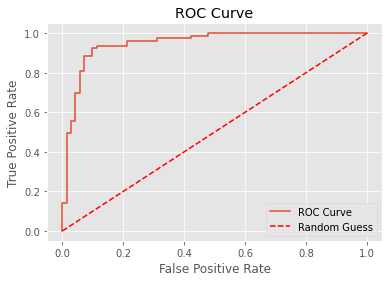

In [71]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()